In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Part A: EXPLORATORY DATA ANALYSIS(EDA)

In [68]:
df=pd.read_csv("C:/Users/ASUS/Downloads/imdb_movie_dataset.csv")

df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [69]:
df.shape

(1000, 12)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [71]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [72]:
df['Rank'].isnull().sum()

0

In [73]:
df['Year'].isnull().sum()

0

In [74]:
df['Runtime (Minutes)'].isnull().sum()

0

In [75]:
df['Rating'].isnull().sum()

0

In [76]:
df['Votes'].isnull().sum()

0

In [77]:
df['Revenue (Millions)'].isnull().sum()

128

In [78]:
df['Metascore'].isnull().sum()

64

In [79]:
df=df.dropna(subset=['Revenue (Millions)'])
df=df.dropna(subset=['Metascore'])

In [80]:
df.drop('Rank',axis=1,inplace=True)

In [81]:
Q1 = df['Year'].quantile(0.25)
Q3 = df['Year'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower)
print("Upper Bound:", upper)
outliers = df[(df["Year"] < lower) | (df["Year"] > upper)]
outliers.shape

Q1: 2010.0
Q3: 2015.0
IQR: 5.0
Lower Bound: 2002.5
Upper Bound: 2022.5


(0, 11)

In [82]:
Q1 = df['Runtime (Minutes)'].quantile(0.25)
Q3 = df['Runtime (Minutes)'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower)
print("Upper Bound:", upper)
outliers = df[(df["Runtime (Minutes)"] < lower) | (df["Runtime (Minutes)"] > upper)]
outliers.shape

Q1: 101.0
Q3: 124.0
IQR: 23.0
Lower Bound: 66.5
Upper Bound: 158.5


(23, 11)

In [83]:
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower)
print("Upper Bound:", upper)
outliers = df[(df["Rating"] < lower) | (df["Rating"] > upper)]
outliers.shape

Q1: 6.3
Q3: 7.5
IQR: 1.2000000000000002
Lower Bound: 4.5
Upper Bound: 9.3


(10, 11)

In [84]:
Q1 = df['Votes'].quantile(0.25)
Q3 = df['Votes'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower)
print("Upper Bound:", upper)
outliers = df[(df["Votes"] < lower) | (df["Votes"] > upper)]
outliers.shape

Q1: 61276.5
Q3: 271083.0
IQR: 209806.5
Lower Bound: -253433.25
Upper Bound: 585792.75


(29, 11)

In [85]:
Q1 = df['Revenue (Millions)'].quantile(0.25)
Q3 = df['Revenue (Millions)'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower)
print("Upper Bound:", upper)
outliers = df[(df["Revenue (Millions)"] < lower) | (df["Revenue (Millions)"] > upper)]
outliers.shape

Q1: 13.967500000000001
Q3: 116.80000000000001
IQR: 102.83250000000001
Lower Bound: -140.28125000000003
Upper Bound: 271.04875000000004


(53, 11)

In [86]:
Q1 = df['Metascore'].quantile(0.25)
Q3 = df['Metascore'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower)
print("Upper Bound:", upper)
outliers = df[(df["Metascore"] < lower) | (df["Metascore"] > upper)]
outliers.shape

Q1: 47.0
Q3: 72.0
IQR: 25.0
Lower Bound: 9.5
Upper Bound: 109.5


(0, 11)

In [87]:
x = df['Votes']
y = df['Revenue (Millions)']

In [88]:
def pearson_manual(x, y):
    x_mean = x.mean()
    y_mean = y.mean()

    numerator = ((x - x_mean) * (y - y_mean)).sum()
    denominator = np.sqrt(((x - x_mean)**2).sum() * ((y - y_mean)**2).sum())

    return numerator / denominator

corr_value = pearson_manual(df['Votes'], df['Revenue (Millions)'])

print("Correlation between Votes and Revenue:", corr_value)

Correlation between Votes and Revenue: 0.6368332506700016


In [89]:
num_cols = [
    'Year',
    'Runtime (Minutes)',
    'Rating',
    'Votes',
    'Revenue (Millions)',
    'Metascore'
]

In [90]:
corr_matrix_manual = pd.DataFrame(
    index=num_cols,
    columns=num_cols,
    dtype=float
)

for col1 in num_cols:
    for col2 in num_cols:
        corr_matrix_manual.loc[col1, col2] = pearson_manual(
            df[col1], df[col2]
        )

print(corr_matrix_manual)

                        Year  Runtime (Minutes)    Rating     Votes  \
Year                1.000000          -0.101933 -0.145703 -0.362445   
Runtime (Minutes)  -0.101933           1.000000  0.374566  0.399298   
Rating             -0.145703           0.374566  1.000000  0.517452   
Votes              -0.362445           0.399298  0.517452  1.000000   
Revenue (Millions) -0.129198           0.281721  0.217106  0.636833   
Metascore          -0.062303           0.221397  0.672731  0.332674   

                    Revenue (Millions)  Metascore  
Year                         -0.129198  -0.062303  
Runtime (Minutes)             0.281721   0.221397  
Rating                        0.217106   0.672731  
Votes                         0.636833   0.332674  
Revenue (Millions)            1.000000   0.142397  
Metascore                     0.142397   1.000000  


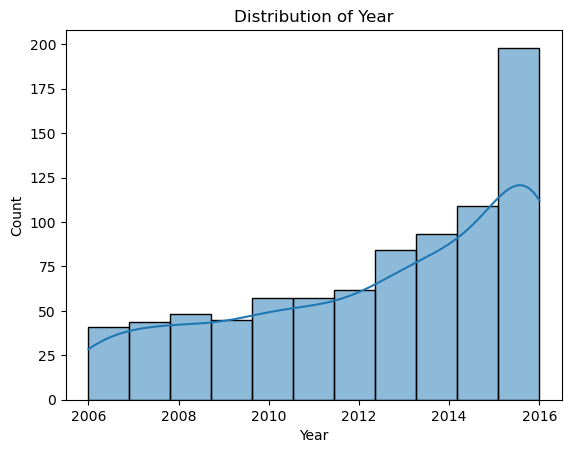

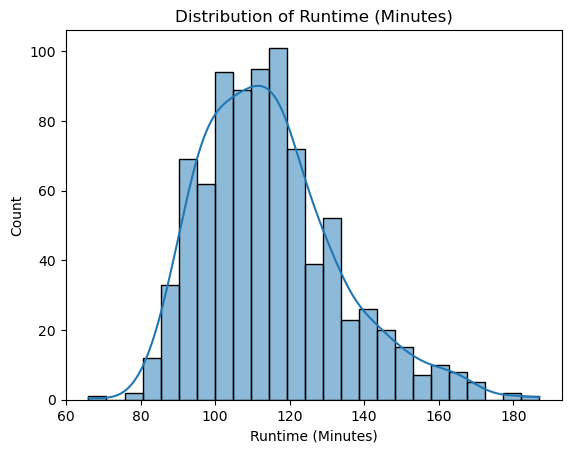

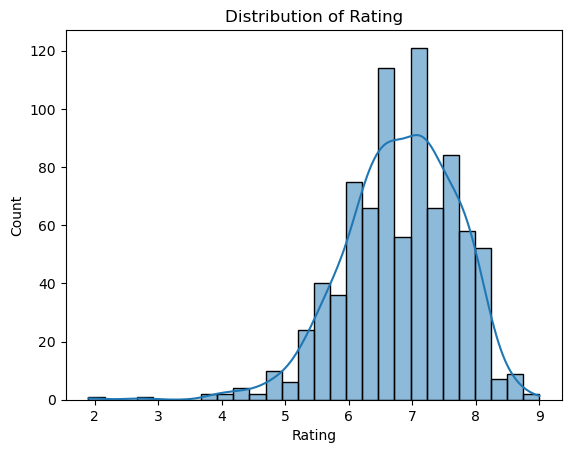

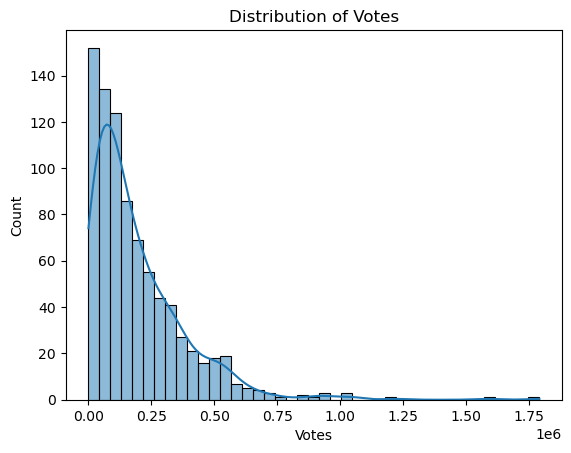

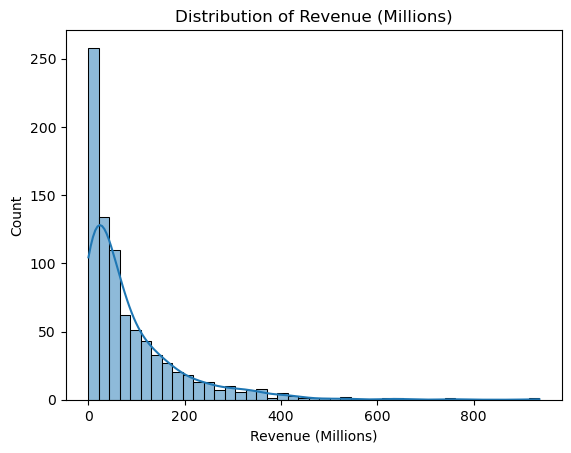

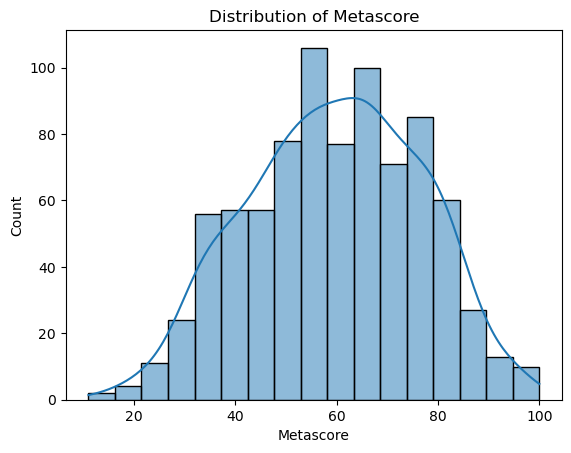

In [91]:
import seaborn as sns
for col in num_cols:
    plt.figure()
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

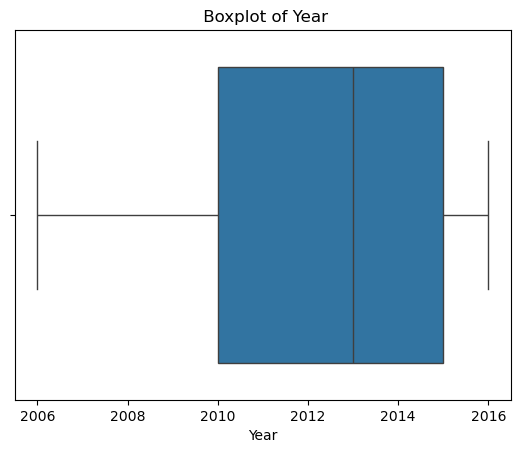

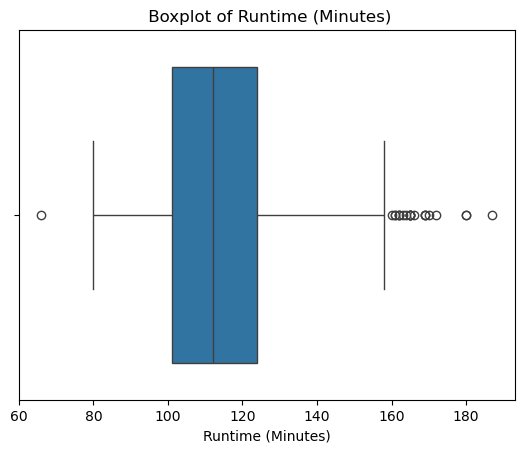

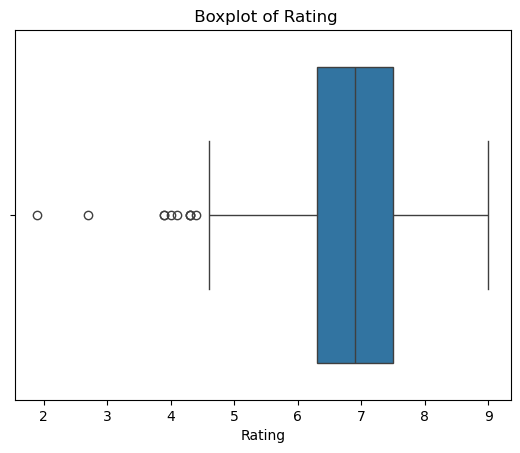

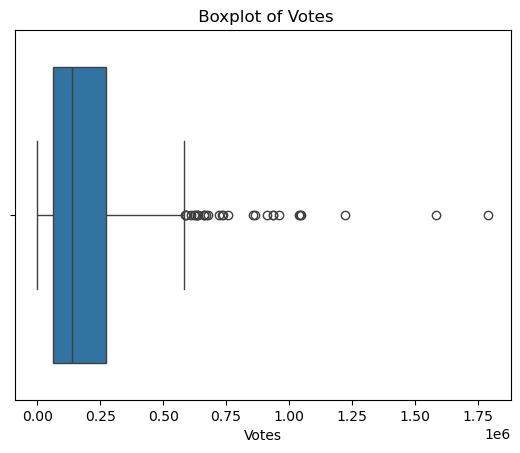

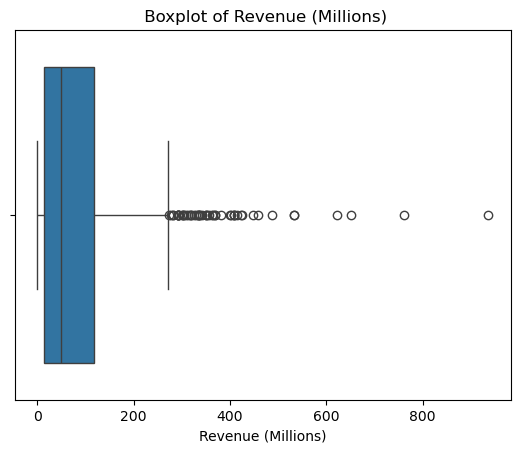

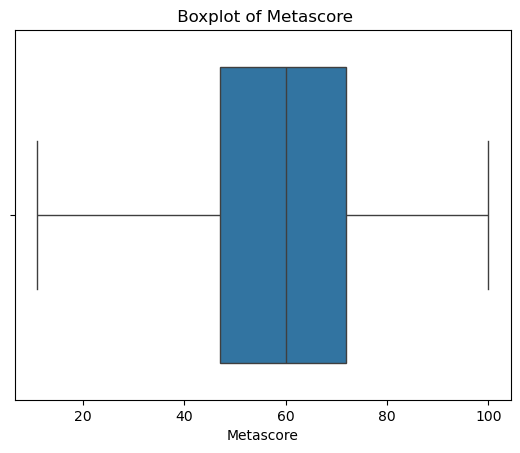

In [92]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f" Boxplot of {col}")
    plt.show()

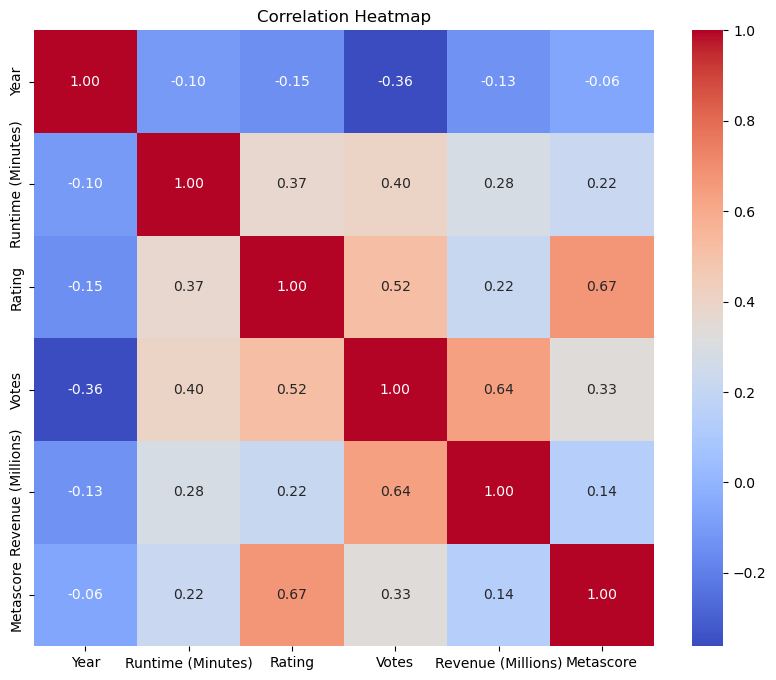

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_manual, annot=True,fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

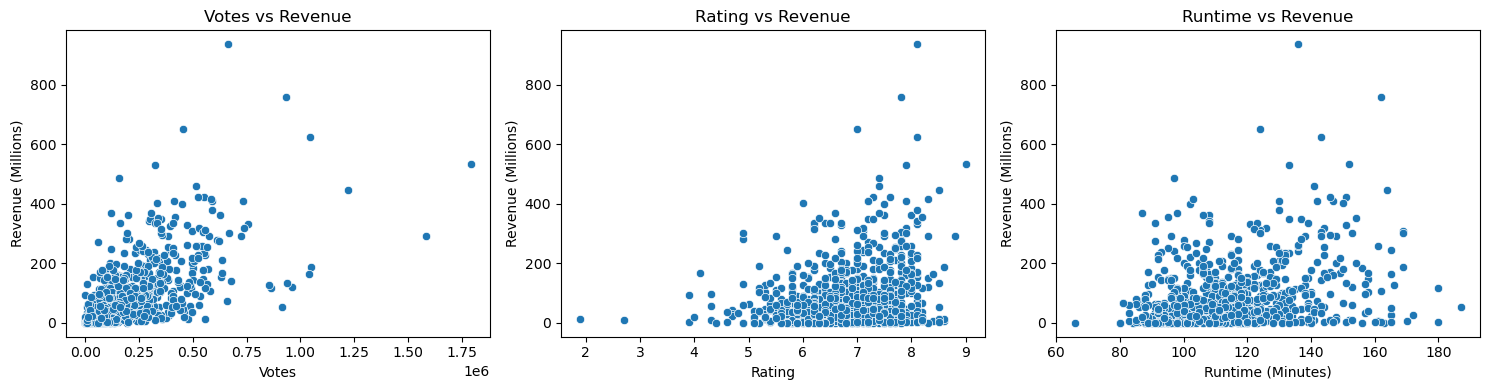

In [94]:
plt.figure(figsize=(15, 4))


plt.subplot(1, 3, 1)
sns.scatterplot(x='Votes', y='Revenue (Millions)', data=df)
plt.title('Votes vs Revenue')


plt.subplot(1, 3, 2)
sns.scatterplot(x='Rating', y='Revenue (Millions)', data=df)
plt.title('Rating vs Revenue')


plt.subplot(1, 3, 3) 
sns.scatterplot(x='Runtime (Minutes)', y='Revenue (Millions)', data=df)
plt.title('Runtime vs Revenue')

plt.tight_layout()
plt.show()

# PART B: SIMPLE LINEAR REGRESSION

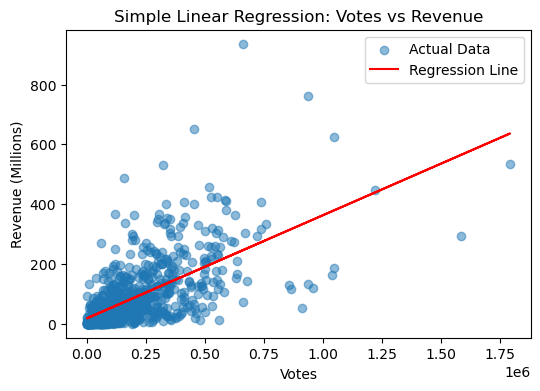

Mean Squared Error (MSE): 7841.167019920675
R-squared (R2 Score): 0.026164101939571305


In [95]:
X = df[['Votes']]      # Independent variable
y = df['Revenue (Millions)']     # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(6,4))
plt.scatter(X, y, alpha=0.5, label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Votes')
plt.ylabel('Revenue (Millions)')
plt.title('Simple Linear Regression: Votes vs Revenue')
plt.legend()
plt.show()

mse = ((y_test-y_pred)**2).mean()

def r2_score(y_test,y_pred):
    y_mean=np.mean(y_test)
    ss_total=np.sum((y_test-y_mean)**2)
    ss_residual=np.sum((y_test-y_pred)**2)
    r2=[1-(ss_residual/ss_total)]
    return r2

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2 Score):", r2)

In [96]:
X = df[['Votes']]
y = df['Revenue (Millions)']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print("Slope (m):", slope)
print("Intercept (c):", intercept)

print("\nINTERPRETATION:")
print(f"Slope: For every 1 unit increase in Votes, Revenue increases by approximately {slope:.4f} units.")
print(f"Intercept: When Votes is 0, the predicted Revenue is approximately {intercept:.2f}.")

Slope (m): 0.0003447037730110154
Intercept (c): 17.957361620680402

INTERPRETATION:
Slope: For every 1 unit increase in Votes, Revenue increases by approximately 0.0003 units.
Intercept: When Votes is 0, the predicted Revenue is approximately 17.96.


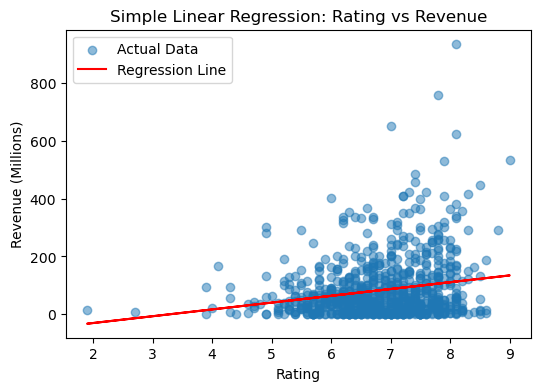

Mean Squared Error (MSE): 12032.908549812282
R-squared (R2 Score): 0.026164101939571305


In [97]:
X = df[['Rating']]      # Independent variable
y = df['Revenue (Millions)']     # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(6,4))
plt.scatter(X, y, alpha=0.5, label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Rating')
plt.ylabel('Revenue (Millions)')
plt.title('Simple Linear Regression: Rating vs Revenue')
plt.legend()
plt.show()

mse = ((y_test-y_pred)**2).mean()

def r2_score(y_test,y_pred):
    y_mean=np.mean(y_test)
    ss_total=np.sum((y_test-y_mean)**2)
    ss_residual=np.sum((y_test-y_pred)**2)
    r2=[1-(ss_residual/ss_total)]
    return r2

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2 Score):", r2)

In [98]:
X = df[['Rating']]
y = df['Revenue (Millions)']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print("Slope (m):", slope)
print("Intercept (c):", intercept)

print("\nINTERPRETATION:")
print(f"Slope: For every 1 unit increase in Rating, Revenue increases by approximately {slope:.4f} units.")
print(f"Intercept: When Rating is 0, the predicted Revenue is approximately {intercept:.2f}.")

Slope (m): 25.85228775924893
Intercept (c): -91.60119811505379

INTERPRETATION:
Slope: For every 1 unit increase in Rating, Revenue increases by approximately 25.8523 units.
Intercept: When Rating is 0, the predicted Revenue is approximately -91.60.


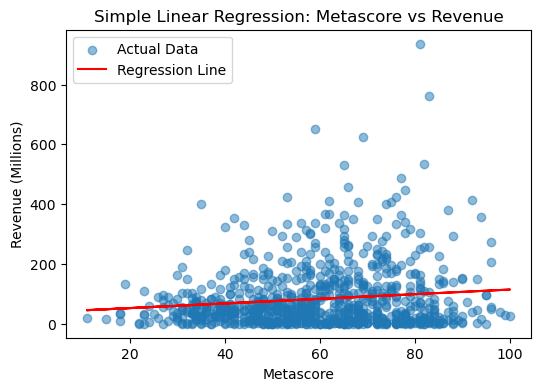

Mean Squared Error (MSE): 12494.686961587846
R-squared (R2 Score): 0.026164101939571305


In [99]:
X = df[['Metascore']]      # Independent variable
y = df['Revenue (Millions)']     # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(6,4))
plt.scatter(X, y, alpha=0.5, label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Metascore')
plt.ylabel('Revenue (Millions)')
plt.title('Simple Linear Regression: Metascore vs Revenue')
plt.legend()
plt.show()

mse = ((y_test-y_pred)**2).mean()

def r2_score(y_test,y_pred):
    y_mean=np.mean(y_test)
    ss_total=np.sum((y_test-y_mean)**2)
    ss_residual=np.sum((y_test-y_pred)**2)
    r2=[1-(ss_residual/ss_total)]
    return r2

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2 Score):", r2)

In [100]:
X = df[['Metascore']]
y = df['Revenue (Millions)']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print("Slope (m):", slope)
print("Intercept (c):", intercept)

print("\nINTERPRETATION:")
print(f"Slope: For every 1 unit increase in Metascore, Revenue increases by approximately {slope:.4f} units.")
print(f"Intercept: When Metascore is 0, the predicted Revenue is approximately {intercept:.2f}.")

Slope (m): 0.8779488330688469
Intercept (c): 32.26059959173137

INTERPRETATION:
Slope: For every 1 unit increase in Metascore, Revenue increases by approximately 0.8779 units.
Intercept: When Metascore is 0, the predicted Revenue is approximately 32.26.


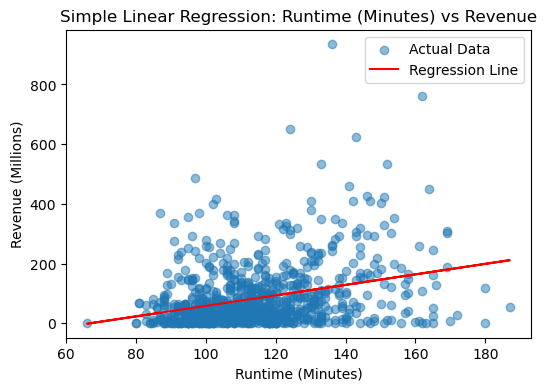

Mean Squared Error (MSE): 12479.599846262554
R-squared (R2 Score): 0.026164101939571305


In [101]:
X = df[['Runtime (Minutes)']]      # Independent variable
y = df['Revenue (Millions)']     # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(6,4))
plt.scatter(X, y, alpha=0.5, label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Revenue (Millions)')
plt.title('Simple Linear Regression: Runtime (Minutes) vs Revenue')
plt.legend()
plt.show()

mse = ((y_test-y_pred)**2).mean()

def r2_score(y_test,y_pred):
    y_mean=np.mean(y_test)
    ss_total=np.sum((y_test-y_mean)**2)
    ss_residual=np.sum((y_test-y_pred)**2)
    r2=[1-(ss_residual/ss_total)]
    return r2

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2 Score):", r2)

In [102]:
X= df[['Runtime (Minutes)']]
y = df['Revenue (Millions)']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print("Slope (m):", slope)
print("Intercept (c):", intercept)

print("\nINTERPRETATION:")
print(f"Slope: For every 1 unit increase in Runtime (Minutes), Revenue increases by approximately {slope:.4f} units.")
print(f"Intercept: When Runtime (Minutes) is 0, the predicted Revenue is approximately {intercept:.2f}.")

Slope (m): 1.5941551092109842
Intercept (c): -98.18687216774657

INTERPRETATION:
Slope: For every 1 unit increase in Runtime (Minutes), Revenue increases by approximately 1.5942 units.
Intercept: When Runtime (Minutes) is 0, the predicted Revenue is approximately -98.19.


# PART C: MULTIPLE LINEAR REGRESSION

MSE: 7766.68656032275
RMSE: 88.12880664301969
R² Score: 0.026164101939571305

Intercept: 105.41359939806755
Coefficients:
Votes: 0.00037650325753022646
Rating: -21.74130903376475
Runtime (Minutes): 0.4567155538188777
Metascore: 0.04380690308163033


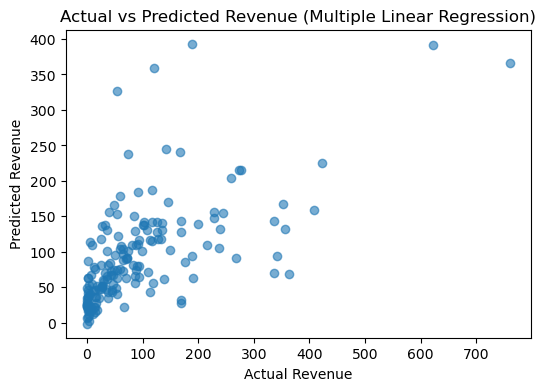

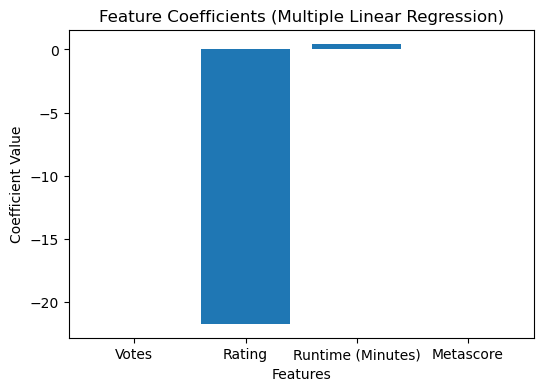

In [103]:
X = df[['Votes', 'Rating', 'Runtime (Minutes)', 'Metascore']]
y = df['Revenue (Millions)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = ((y_test-y_pred)**2).mean()
def r2_score(y_test,y_pred):
    y_mean=np.mean(y_test)
    ss_total=np.sum((y_test-y_mean)**2)
    ss_residual=np.sum((y_test-y_pred)**2)
    r2=[1-(ss_residual/ss_total)]
    return r2
rmse = np.sqrt(mse)


print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


print("\nIntercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue (Multiple Linear Regression)")
plt.show()

plt.figure(figsize=(6,4))
plt.bar(X.columns, model.coef_)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Coefficients (Multiple Linear Regression)")
plt.show()

# PART D: POLYNOMIAL REGRESSION

LINEAR REGRESSION
MSE: 7841.167019920675
RMSE: 88.55036431274958
R2 Score: [0.3881206111770378]

POLYNOMIAL REGRESSION
MSE: 7816.442909130372
RMSE: 88.41064929707491
R2 Score: [0.39004993799294774]


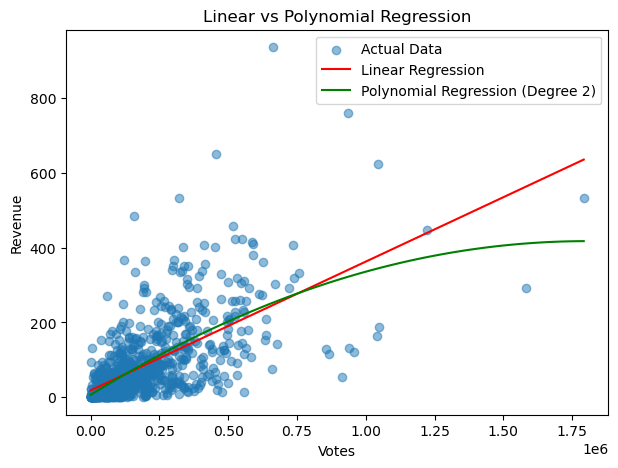

In [104]:

X = df[['Votes']]      # independent variable
y = df['Revenue (Millions)']     # target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("LINEAR REGRESSION")
print("MSE:", mse_lin)
print("RMSE:", rmse_lin)
print("R2 Score:", r2_lin)

print("\nPOLYNOMIAL REGRESSION")
print("MSE:", mse_poly)
print("RMSE:", rmse_poly)
print("R2 Score:", r2_poly)

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

plt.figure(figsize=(7,5))
plt.scatter(X, y, alpha=0.5, label="Actual Data")

plt.plot(X_range, lin_model.predict(X_range),
         color='red', label="Linear Regression")

plt.plot(X_range, poly_model.predict(poly.transform(X_range)),
         color='green', label="Polynomial Regression (Degree 2)")

plt.xlabel("Votes")
plt.ylabel("Revenue")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()

# PART E: REGULARIZATION

LINEAR COEFFICIENTS:
Votes: 71.37108572241637
Rating: -18.991997628322288
Runtime (Minutes): 8.087310974321138
Metascore: 0.7450662339547525

RIDGE COEFFICIENTS:
Votes: 71.20227075419963
Rating: -18.859027230989145
Runtime (Minutes): 8.106337254331319
Metascore: 0.7060677045440427

LASSO COEFFICIENTS:
Votes: 71.1995881224645
Rating: -18.558373726357885
Runtime (Minutes): 7.970471580291512
Metascore: 0.4366044130398835


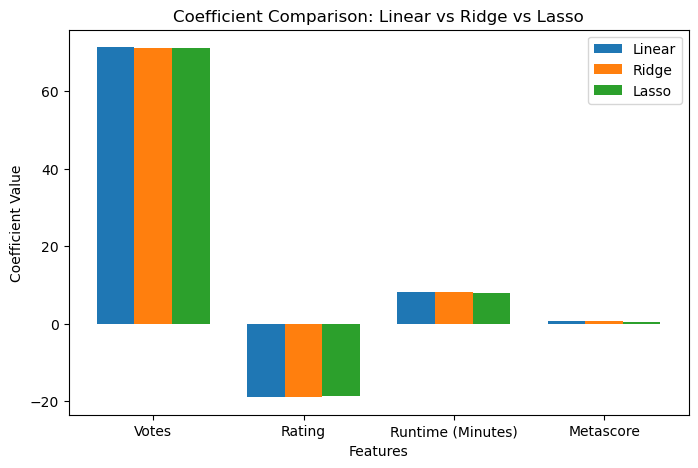

In [105]:
X = df[['Votes', 'Rating', 'Runtime (Minutes)', 'Metascore']]
y = df['Revenue (Millions)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_model = LinearRegression()
lin_model.fit(X_train_scaled, y_train)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

features = X.columns

lin_coef = lin_model.coef_
ridge_coef = ridge_model.coef_
lasso_coef = lasso_model.coef_

print("LINEAR COEFFICIENTS:")
for f, c in zip(features, lin_coef):
    print(f"{f}: {c}")

print("\nRIDGE COEFFICIENTS:")
for f, c in zip(features, ridge_coef):
    print(f"{f}: {c}")

print("\nLASSO COEFFICIENTS:")
for f, c in zip(features, lasso_coef):
    print(f"{f}: {c}")

x = np.arange(len(features))
width = 0.25

plt.figure(figsize=(8,5))
plt.bar(x - width, lin_coef, width, label='Linear')
plt.bar(x, ridge_coef, width, label='Ridge')
plt.bar(x + width, lasso_coef, width, label='Lasso')

plt.xticks(x, features)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Comparison: Linear vs Ridge vs Lasso")
plt.legend()
plt.show()

# PART F: MODEL DIAGNOSTICS

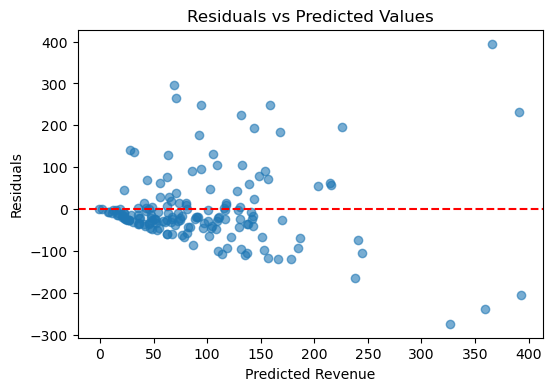

In [106]:
X = df[['Votes', 'Rating', 'Runtime (Minutes)', 'Metascore']]
y = df['Revenue (Millions)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Revenue")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()